# Project Overview
The project objective is to build a machine learning model to classify whether the news is fake or not based on the text of it.

I Will be using the 'news.csv' dataset, you may find it here: https://drive.google.com/file/d/1er9NJTLUA3qnRuyhfzuN0XUsoIC4a-_q/view

This project is taken from this website: https://data-flair.training/blogs/advanced-python-project-detecting-fake-news/

**TfidfVectorizer** will be used as the feature extractor which will return the tf-idf scores for the words inside the whole dataset reflecting the importance and relevance of them. You may find more information on tf-idf here: https://en.wikipedia.org/wiki/Tf%E2%80%93idf

TfidfVectorizer scikit-learn documentation: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

Instead of just trying the **PassiveAggressiveClassifier** I will be trying various machine learning algorithms and perform hyperparameter tuning on each one of the algorithms

I will also build a deep neural network using Keras API to compare its performance with the traditional machine learning techniques

# Importing the libraries
1) pandas: for loading the dataset

2) seaborn: for visualization

3) sklearn: for feature extraction as will as machine learning

4) keras: for building deep learning model

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
import tensorflow
from tensorflow import keras
from keras.layers import Dense, Dropout, BatchNormalization
from keras import Sequential
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

# Loading the dataset into 'news_data' DataFrame 

In [2]:
news_data = pd.read_csv('Dataset/news.csv')

# Printing the first 5 rows of the data

In [3]:
display(news_data.head())

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


# Printing the shape of the DataFrame

In [4]:
display(news_data.shape)

(6335, 4)

# Displaying the infomation about the DataFrame

In [5]:
news_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


# Extracting the features (X) and the labels (y) from the dataset

In [6]:
X = news_data.loc[:,'text'].values
y = news_data['label'].values

# Splitting the Dataset into 80% training and 20% testing

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

# Displaying the training the testing shapes

In [8]:
print("The Training Shape: ", X_train.shape)
print("The Testing Shape: ", X_test.shape)

The Training Shape:  (5068,)
The Testing Shape:  (1267,)


# Creating TfidfVectorizer Instance and apply the transformation in X_train, X_test

In [9]:
feature_ext = TfidfVectorizer(stop_words='english')
train_feature = feature_ext.fit_transform(X_train)
test_feature = feature_ext.transform(X_test)
display("Training Feature Matrix: ", train_feature)
display("Testing Feature Matrix: ", test_feature)

'Training Feature Matrix: '

<5068x61595 sparse matrix of type '<class 'numpy.float64'>'
	with 1343980 stored elements in Compressed Sparse Row format>

'Testing Feature Matrix: '

<1267x61595 sparse matrix of type '<class 'numpy.float64'>'
	with 315156 stored elements in Compressed Sparse Row format>

# Getting some insights from the vectorization
vocabulary_ : a dictionary that contains each word and the corresponding index in the matrix


In [10]:
display((feature_ext.vocabulary_))

{'president': 42713,
 'obama': 38403,
 'offered': 38675,
 'enthusiastic': 18933,
 'support': 53108,
 'hillary': 25891,
 'clinton': 11337,
 'democratic': 15200,
 'national': 37098,
 'convention': 12864,
 'wednesday': 59379,
 'painted': 39874,
 'hopeful': 26377,
 'picture': 41335,
 'country': 13320,
 'barack': 6112,
 'presidential': 42715,
 'candidate': 9458,
 'wave': 59243,
 'crowd': 13780,
 'spoke': 51474,
 'philadelphia': 41181,
 'penn': 40745,
 'july': 29960,
 '27': 891,
 '2016': 703,
 'described': 15538,
 'optimistic': 39060,
 'america': 3662,
 'speech': 51318,
 'night': 37691,
 'pointedly': 41904,
 'diverging': 16740,
 'foreboding': 21755,
 'tone': 55212,
 'previous': 42802,
 'week': 59389,
 'republican': 45919,
 'event': 19525,
 'mr': 36454,
 'endorsement': 18718,
 'saying': 48078,
 'qualified': 43885,
 'galvanized': 22682,
 'delegates': 15064,
 'drawing': 17296,
 'sharp': 49328,
 'contrast': 12816,
 'dark': 14406,
 'portrait': 42208,
 'nominee': 37890,
 'donald': 16999,
 'trump':

In [11]:
ModelsAccuracies = [] # A list to hold the accuracy scores of the models for visualization

# 1) LogisticRegression

In [12]:
LRParameters = {'C':np.logspace(-2, 3, 6) , 'solver':('newton-cg', 'sag', 'liblinear', 'lbfgs')}
LRModel = GridSearchCV(LogisticRegression(), LRParameters, cv = 5)
LRModel.fit(train_feature, y_train)
display(LRModel.best_params_)

c:\users\mahmoudayman\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\mahmoudayman\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\mahmoudayman\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\mahmoudayman\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached wh

{'C': 1000.0, 'solver': 'sag'}

In [13]:
LRPredictions = LRModel.predict(test_feature)
print("The Classification Report: \n", classification_report(y_test, LRPredictions))
print("The Confusion Matrix: \n", confusion_matrix(y_test, LRPredictions))
ModelsAccuracies.append(accuracy_score(y_test, LRPredictions))

The Classification Report: 
               precision    recall  f1-score   support

        FAKE       0.93      0.95      0.94       633
        REAL       0.95      0.93      0.94       634

    accuracy                           0.94      1267
   macro avg       0.94      0.94      0.94      1267
weighted avg       0.94      0.94      0.94      1267

The Confusion Matrix: 
 [[604  29]
 [ 45 589]]


# 2) DecisionTreeClassifier

In [14]:
DTParameters = {'min_samples_split': np.logspace(1, 5, base=2, num=5).astype('int'), 'max_leaf_nodes': np.logspace(1, 5, base=2, num=5).astype('int')}
DTModel = GridSearchCV(DecisionTreeClassifier(), DTParameters, cv = 5)
DTModel.fit(train_feature, y_train)
display(DTModel.best_params_)

{'max_leaf_nodes': 32, 'min_samples_split': 2}

In [15]:
DTPredictions = DTModel.predict(test_feature)
print("The Classification Report: \n", classification_report(y_test, DTPredictions))
print("The Confusion Matrix: \n", confusion_matrix(y_test, DTPredictions))
ModelsAccuracies.append(accuracy_score(y_test, DTPredictions))

The Classification Report: 
               precision    recall  f1-score   support

        FAKE       0.80      0.82      0.81       633
        REAL       0.81      0.80      0.81       634

    accuracy                           0.81      1267
   macro avg       0.81      0.81      0.81      1267
weighted avg       0.81      0.81      0.81      1267

The Confusion Matrix: 
 [[517 116]
 [128 506]]


# 3) RandomForestClassifier

In [16]:
RFParameters = {'n_estimators':[100, 200, 300], 'min_samples_split': np.logspace(1, 5, base=2, num=5).astype('int'), 'max_leaf_nodes': np.logspace(1, 5, base=2, num=5).astype('int')}
RFModel = GridSearchCV(RandomForestClassifier(), RFParameters, cv = 5)
RFModel.fit(train_feature, y_train)
display(RFModel.best_params_)

{'max_leaf_nodes': 32, 'min_samples_split': 8, 'n_estimators': 200}

In [17]:
RFPredictions = RFModel.predict(test_feature)
print("The Classification Report: \n", classification_report(y_test, RFPredictions))
print("The Confusion Matrix: \n", confusion_matrix(y_test, RFPredictions))
ModelsAccuracies.append(accuracy_score(y_test, RFPredictions))

The Classification Report: 
               precision    recall  f1-score   support

        FAKE       0.83      0.90      0.86       633
        REAL       0.89      0.81      0.85       634

    accuracy                           0.85      1267
   macro avg       0.86      0.85      0.85      1267
weighted avg       0.86      0.85      0.85      1267

The Confusion Matrix: 
 [[567  66]
 [120 514]]


# 4) AdaBoostClassifier

In [18]:
AdaParameters = {'learning_rate': np.logspace(-1, 0, 5)}
AdaModel = GridSearchCV(AdaBoostClassifier(), AdaParameters, cv = 5)
AdaModel.fit(train_feature, y_train)
display(AdaModel.best_params_)

{'learning_rate': 0.5623413251903491}

In [19]:
AdaPredictions = AdaModel.predict(test_feature)
print("The Classification Report: \n", classification_report(y_test, AdaPredictions))
print("The Confusion Matrix: \n", confusion_matrix(y_test, AdaPredictions))
ModelsAccuracies.append(accuracy_score(y_test, AdaPredictions))

The Classification Report: 
               precision    recall  f1-score   support

        FAKE       0.83      0.89      0.86       633
        REAL       0.89      0.82      0.85       634

    accuracy                           0.86      1267
   macro avg       0.86      0.86      0.86      1267
weighted avg       0.86      0.86      0.86      1267

The Confusion Matrix: 
 [[566  67]
 [115 519]]


# 5) Deep Neural Network (Non-regularized)

Encoding the training and testing labels is essential because the model does not support dealing with string values

In [20]:
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
display(y_train)
display(y_train_encoded) # REAL=1, FAKE=0

y_test_encoded = encoder.transform(y_test)
display(y_test)
display(y_test_encoded)

array(['REAL', 'FAKE', 'FAKE', ..., 'FAKE', 'FAKE', 'FAKE'], dtype=object)

array([1, 0, 0, ..., 0, 0, 0])

array(['REAL', 'FAKE', 'REAL', ..., 'REAL', 'FAKE', 'REAL'], dtype=object)

array([1, 0, 1, ..., 1, 0, 1])

In [21]:
DLModel = Sequential([
    Dense(256, input_shape = [train_feature.shape[1]], activation='relu'), 
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])
DLModel.compile(optimizer='Adam', loss='binary_crossentropy', metrics='binary_accuracy')
DLModel.fit(train_feature, y_train_encoded, batch_size=512, epochs=10)

Epoch 1/10


c:\users\mahmoudayman\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\framework\indexed_slices.py:447: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Reshape:0", shape=(None, 256), dtype=float32), dense_shape=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


10/10 [==============================] - 10s 753ms/step - loss: 0.6421 - binary_accuracy: 0.8489
Epoch 2/10
10/10 [==============================] - 8s 797ms/step - loss: 0.3414 - binary_accuracy: 0.9576
Epoch 3/10
10/10 [==============================] - 8s 784ms/step - loss: 0.0803 - binary_accuracy: 0.9828
Epoch 4/10
10/10 [==============================] - 8s 774ms/step - loss: 0.0128 - binary_accuracy: 0.9978
Epoch 5/10
10/10 [==============================] - 8s 827ms/step - loss: 0.0025 - binary_accuracy: 1.0000
Epoch 6/10
10/10 [==============================] - 8s 775ms/step - loss: 9.7533e-04 - binary_accuracy: 1.0000
Epoch 7/10
10/10 [==============================] - 8s 775ms/step - loss: 6.6742e-04 - binary_accuracy: 1.0000
Epoch 8/10
10/10 [==============================] - 8s 767ms/step - loss: 5.2093e-04 - binary_accuracy: 1.0000
Epoch 9/10
10/10 [==============================] - 8s 788ms/step - loss: 4.4634e-04 - binary_accuracy: 1.0000
Epoch 10/10
10/10 [============

In [22]:
# The output from sigmoid activation is probability 
DLPrediction = (DLModel.predict(test_feature) >= 0.5).astype('int').ravel()
print("The Classification Report: \n", classification_report(y_test_encoded, DLPrediction, target_names=['FAKE','REAL']))
print("The Confusion Matrix: \n", confusion_matrix(y_test_encoded, DLPrediction))
ModelsAccuracies.append(accuracy_score(y_test_encoded, DLPrediction))

The Classification Report: 
               precision    recall  f1-score   support

        FAKE       0.94      0.94      0.94       633
        REAL       0.94      0.94      0.94       634

    accuracy                           0.94      1267
   macro avg       0.94      0.94      0.94      1267
weighted avg       0.94      0.94      0.94      1267

The Confusion Matrix: 
 [[595  38]
 [ 39 595]]


# 6) Deep Neural Network (Regularized)
The model clearly was overfitting the training data as shown above during training.

I will try to enhance the above model by applying some regularization techniques.

In [23]:
DLRModel = Sequential([
    Dense(256, input_shape = [train_feature.shape[1]], activation='relu'),
    Dropout(0.75),
    Dense(128, activation='relu'),
    Dropout(0.75),
    Dense(64, activation='relu'),
    Dropout(0.75),
    Dense(1, activation='sigmoid')
])
DLRModel.compile(optimizer='Adam', loss='binary_crossentropy', metrics='binary_accuracy')
DLRModel.fit(train_feature, y_train_encoded, batch_size=512, epochs=10)

Epoch 1/10


c:\users\mahmoudayman\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\framework\indexed_slices.py:447: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_1/dense_4/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_1/dense_4/embedding_lookup_sparse/Reshape:0", shape=(None, 256), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_1/dense_4/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


10/10 [==============================] - 10s 770ms/step - loss: 0.6912 - binary_accuracy: 0.5292
Epoch 2/10
10/10 [==============================] - 8s 760ms/step - loss: 0.6811 - binary_accuracy: 0.5789
Epoch 3/10
10/10 [==============================] - 8s 808ms/step - loss: 0.6382 - binary_accuracy: 0.6926
Epoch 4/10
10/10 [==============================] - 8s 784ms/step - loss: 0.5301 - binary_accuracy: 0.7985
Epoch 5/10
10/10 [==============================] - 8s 788ms/step - loss: 0.3718 - binary_accuracy: 0.8792
Epoch 6/10
10/10 [==============================] - 8s 794ms/step - loss: 0.2226 - binary_accuracy: 0.9359
Epoch 7/10
10/10 [==============================] - 8s 781ms/step - loss: 0.1370 - binary_accuracy: 0.9629
Epoch 8/10
10/10 [==============================] - 8s 779ms/step - loss: 0.0828 - binary_accuracy: 0.9797
Epoch 9/10
10/10 [==============================] - 8s 782ms/step - loss: 0.0569 - binary_accuracy: 0.9870
Epoch 10/10
10/10 [============================

In [24]:
DLRPrediction = (DLRModel.predict(test_feature) >= 0.5).astype('int').ravel()
print("The Classification Report: \n", classification_report(y_test_encoded, DLRPrediction, target_names=['FAKE','REAL']))
print("The Confusion Matrix: \n", confusion_matrix(y_test_encoded, DLRPrediction))
ModelsAccuracies.append(accuracy_score(y_test_encoded, DLRPrediction))

The Classification Report: 
               precision    recall  f1-score   support

        FAKE       0.94      0.94      0.94       633
        REAL       0.94      0.94      0.94       634

    accuracy                           0.94      1267
   macro avg       0.94      0.94      0.94      1267
weighted avg       0.94      0.94      0.94      1267

The Confusion Matrix: 
 [[595  38]
 [ 37 597]]


# Visuallization of Models Accuracy Scores

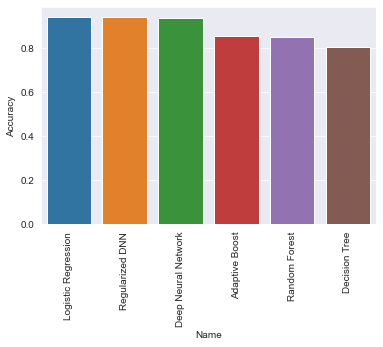

In [25]:
ModelsName= ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Adaptive Boost', 'Deep Neural Network', 'Regularized DNN']
model_accuracies = pd.DataFrame({'Name':ModelsName , 'Accuracy':ModelsAccuracies})
sns.set_style('darkgrid')
sns.barplot(x='Name', y='Accuracy', data=model_accuracies.sort_values('Accuracy', ascending = False))
plt.xticks(rotation=90)
plt.show()